Этот код выполняет линейную регрессию с использованием различных методов оптимизации таких как:

-Batch gradient descent

-stochastic gradient descent

-Linear regression


импорт всех нужных библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor


загрузка cvs файла

In [4]:
file_path = 'CarPrice_Assignment.csv'
data = pd.read_csv(file_path)

информация о данных

In [5]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

проверяю пропущенные значения

In [6]:
print(data.isnull().sum())


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


визуализация данных чтобы я поняла данные

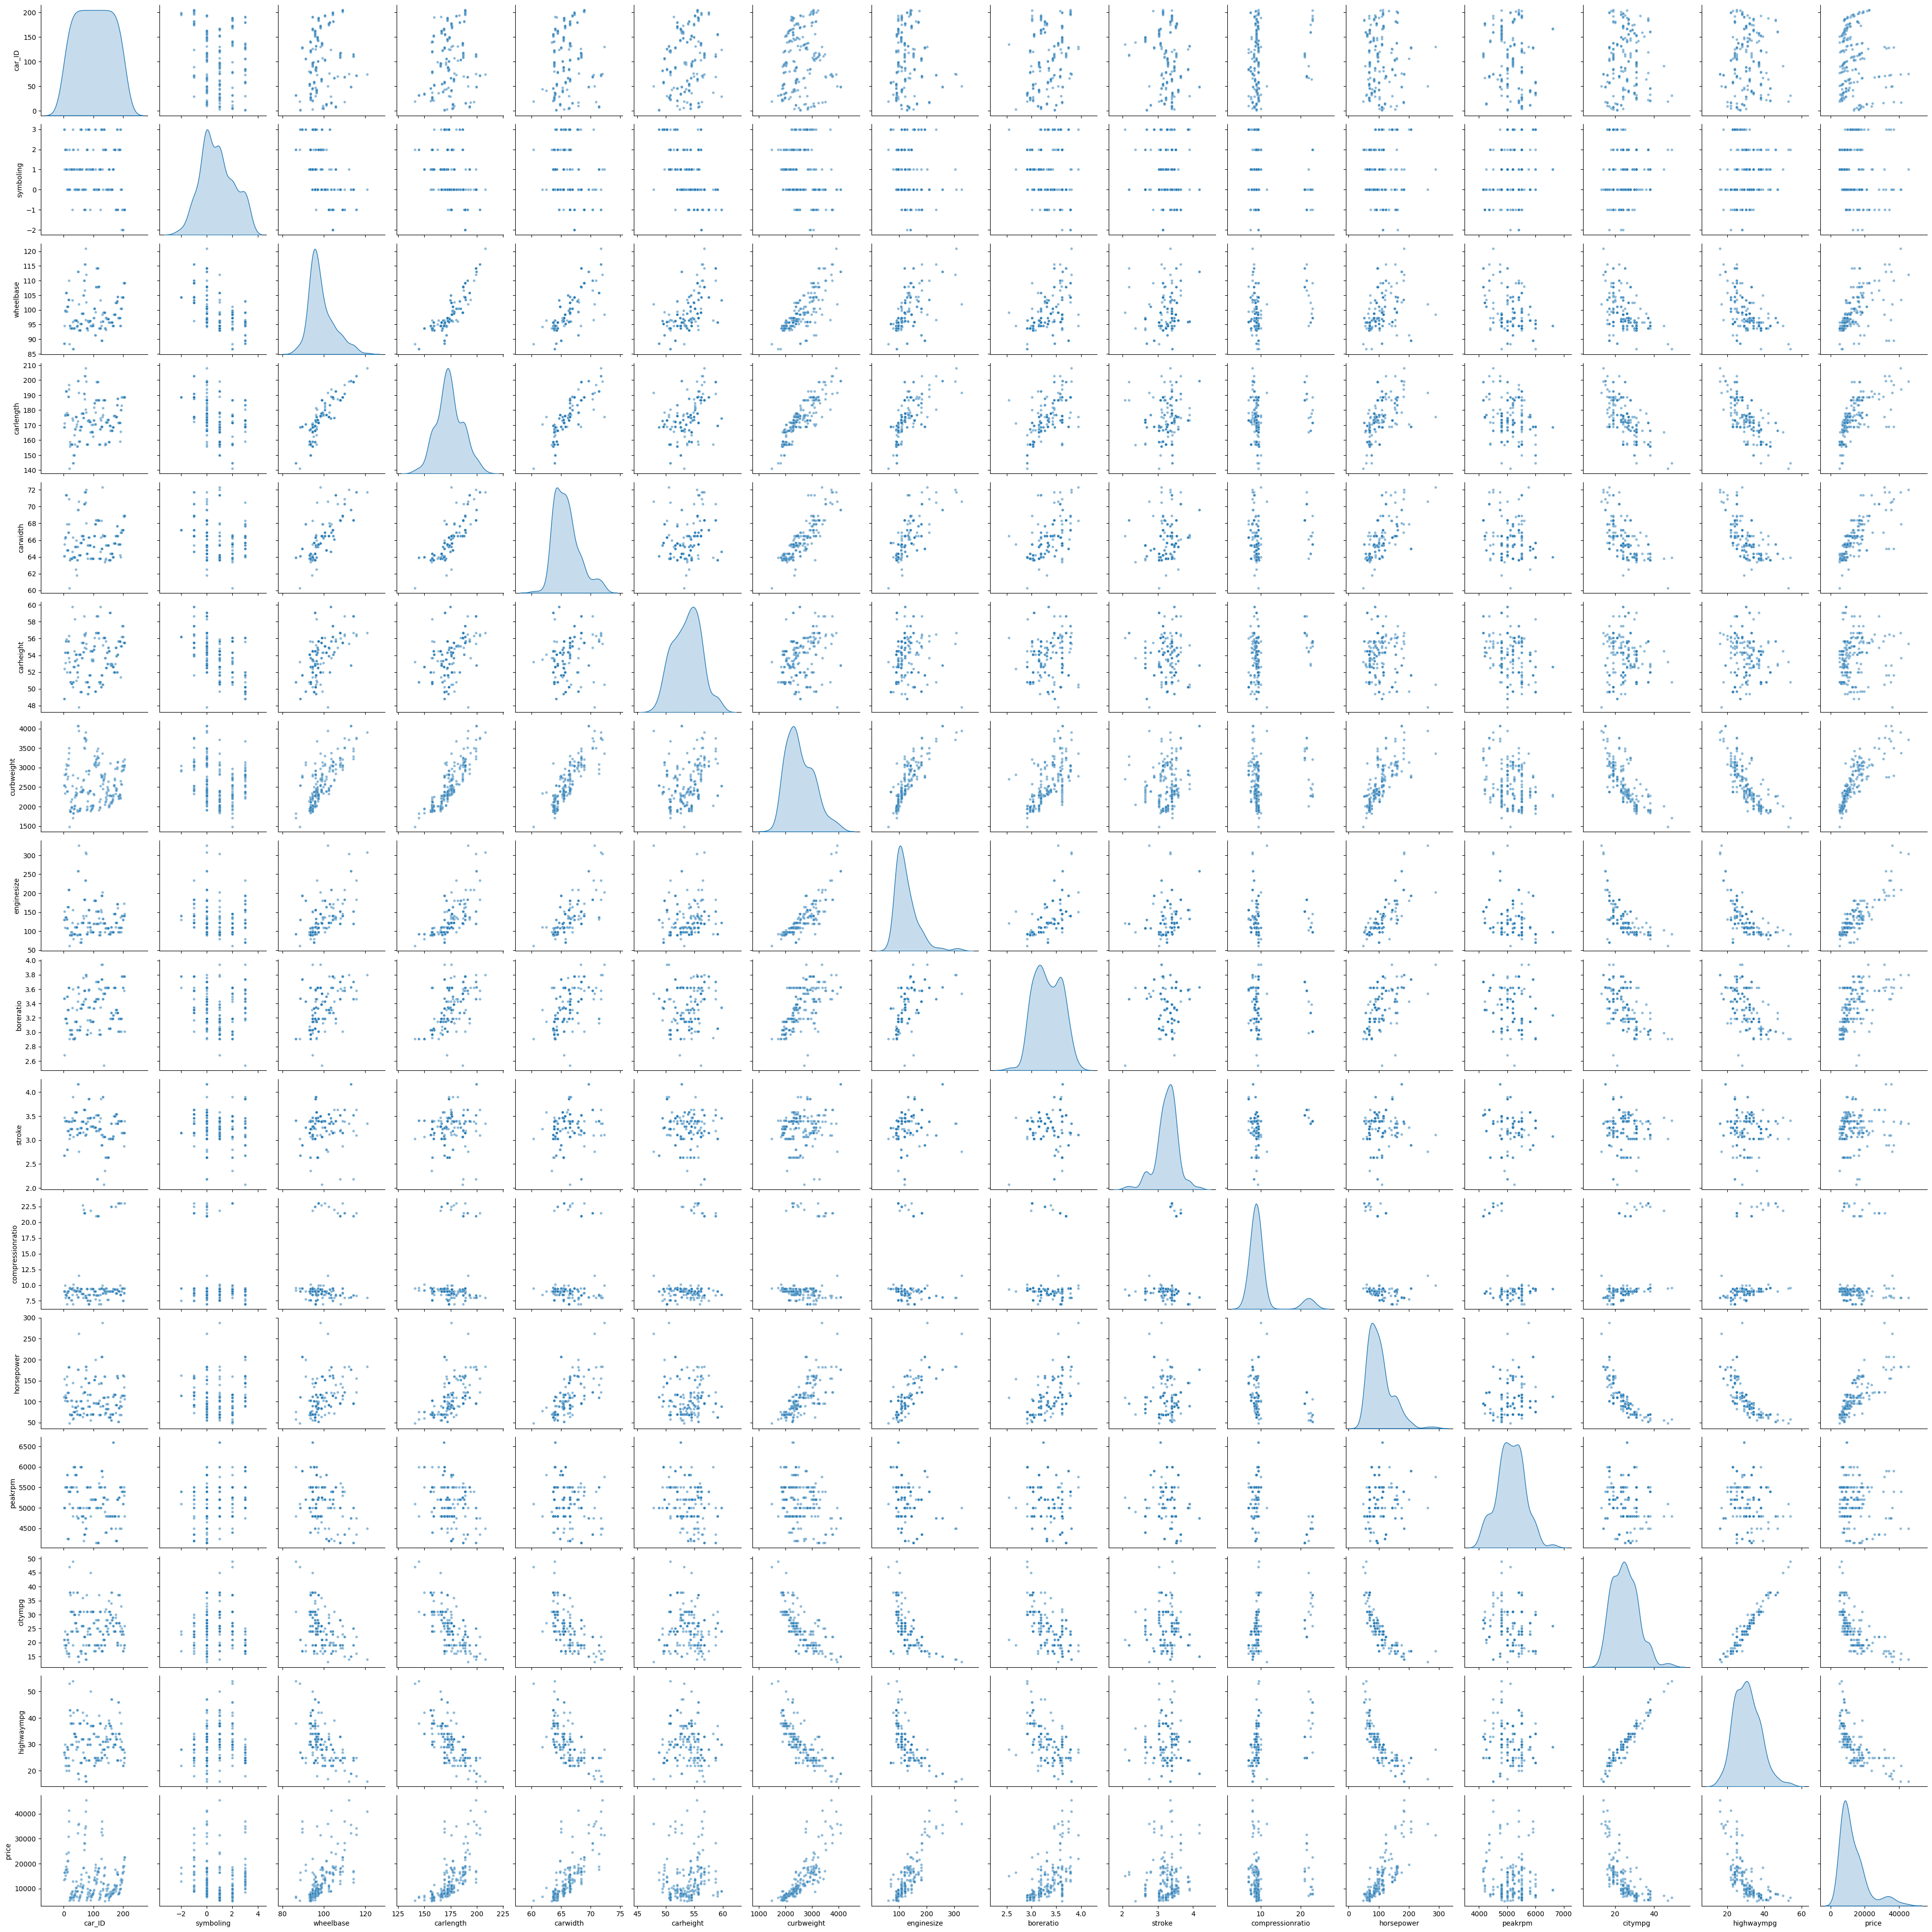

In [7]:
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha':0.5, 's':15})
plt.show()

теперь я делю данные на признаки т.е х и целевую переменную y

In [8]:
X = data.drop(columns=["CarName", 'price', "car_ID"])
y = data['price']

создаю тепловую карту корреляции

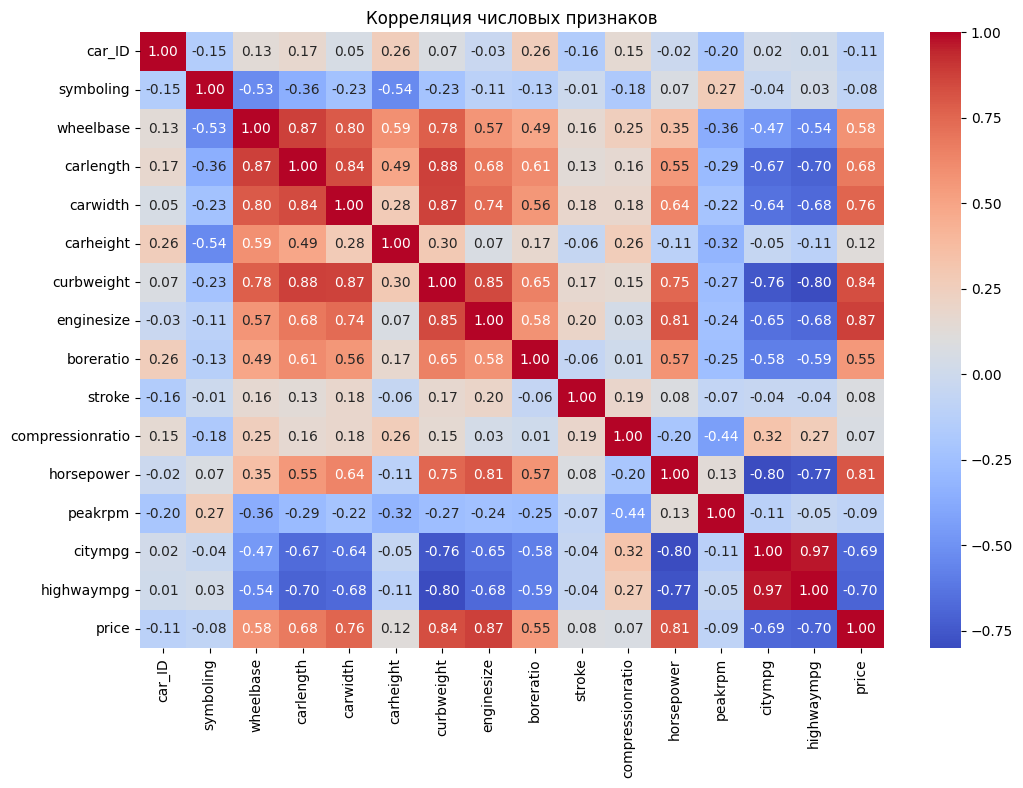

In [9]:
plt.figure(figsize=(12, 8))
numerical_data = data.select_dtypes(include=[np.number])
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляция числовых признаков')
plt.show()

и теперь я логарифмирую целевую переменную для нормализации

In [10]:
data['log_price'] = np.log1p(data['price'])
X = data.drop(columns=['CarName', 'price', 'car_ID', 'log_price'])
y = data['log_price']


разделяю на обучающую и тестовую выборку

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

преобразование данных т.е нормализация числовых и кодирование категориальных

In [12]:
numerical_cols = X.select_dtypes(include=["number"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

класс для Batch gradient descent

In [13]:
class BatchGDLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.loss_history = []

    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.zeros(X.shape[1])
        m = len(y)

        for iteration in range(self.n_iterations):
            predictions = X.dot(self.theta)
            gradients = (2 / m) * X.T.dot(predictions - y)
            self.theta -= self.learning_rate * gradients
            loss = mean_squared_error(y, predictions)
            self.loss_history.append(loss)

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return X.dot(self.theta)

теперь я обучаю модель

In [14]:
batch_gd = BatchGDLinearRegression(learning_rate=0.01, n_iterations=500)
batch_gd.fit(X_train, y_train)
batch_gd_predictions = batch_gd.predict(X_test)

оценка

In [15]:
batch_gd_mse = mean_squared_error(y_test, batch_gd_predictions)
batch_gd_rmse = np.sqrt(batch_gd_mse)
batch_gd_r2 = r2_score(y_test, batch_gd_predictions)
print(f"Batch GD - RMSE: {batch_gd_rmse:.2f}, R²: {batch_gd_r2:.2f}")


Batch GD - RMSE: 0.51, R²: 0.06


стохастический градиентный спуск теперь

In [16]:
sgd_model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01, random_state=42)
sgd_model.fit(X_train, y_train)
sgd_predictions = sgd_model.predict(X_test)

оценка

In [17]:
sgd_mse = mean_squared_error(y_test, sgd_predictions)
sgd_rmse = np.sqrt(sgd_mse)
sgd_r2 = r2_score(y_test, sgd_predictions)
print(f"SGD - RMSE: {sgd_rmse:.2f}, R²: {sgd_r2:.2f}")

SGD - RMSE: 0.29, R²: 0.69


линейная регрессия

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_predictions = lin_reg.predict(X_test)


оценка

In [19]:
lin_reg_mse = mean_squared_error(y_test, lin_reg_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_r2 = r2_score(y_test, lin_reg_predictions)
print(f"Linear Regression - RMSE: {lin_reg_rmse:.2f}, R²: {lin_reg_r2:.2f}")

Linear Regression - RMSE: 0.18, R²: 0.88


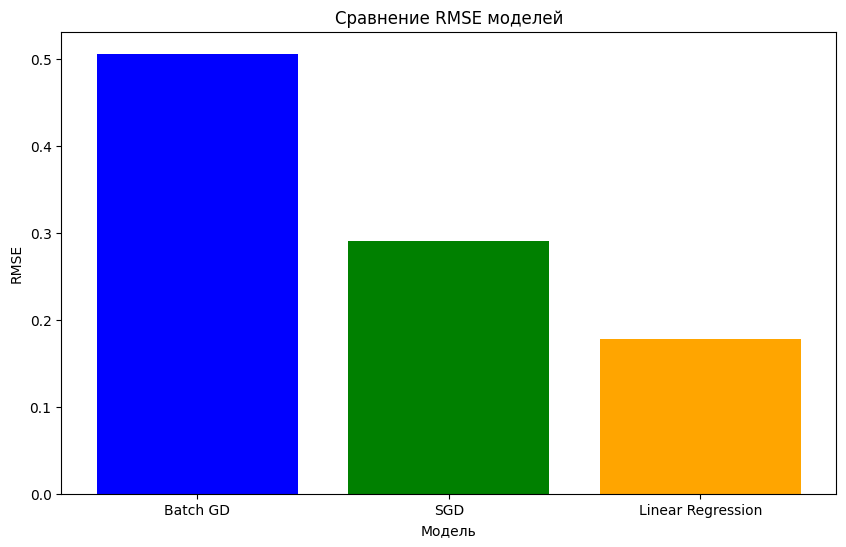

In [20]:
models = ["Batch GD", "SGD", "Linear Regression"]
rmse_scores = [batch_gd_rmse, sgd_rmse, lin_reg_rmse]
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color=['blue', 'green', 'orange'])
plt.title("Сравнение RMSE моделей")
plt.ylabel("RMSE")
plt.xlabel("Модель")
plt.show()


In [21]:
print(f"Batch GD - RMSE: {batch_gd_rmse:.2f}, R²: {batch_gd_r2:.2f}")
print(f"SGD - RMSE: {sgd_rmse:.2f}, R²: {sgd_r2:.2f}")
print(f"Linear Regression - RMSE: {lin_reg_rmse:.2f}, R²: {lin_reg_r2:.2f}")

Batch GD - RMSE: 0.51, R²: 0.06
SGD - RMSE: 0.29, R²: 0.69
Linear Regression - RMSE: 0.18, R²: 0.88


исходя из результата понятно что batch gd работает хуже всех, а линейная регрессия работает лучше

Batch GD

RMSE = 0.51 (большая ошибка)

R² = 0.06 (очень низкое качество предсказаний)
→ ❌ Плохая модель

SGD

RMSE = 0.29 (меньше, но не минимально)

R² = 0.69 (неплохо, но есть куда улучшать)
→ ⚠️ Средний результат

Linear Regression

RMSE = 0.18 (наименьшая ошибка)

R² = 0.88 (лучшее объяснение данных)
→ ✅ Лучшая модель

Фактические vs Предсказанные значения

Показывает, насколько предсказанные значения совпадают с реальными.
Если модель идеальна, все точки должны лежать на диагонали.

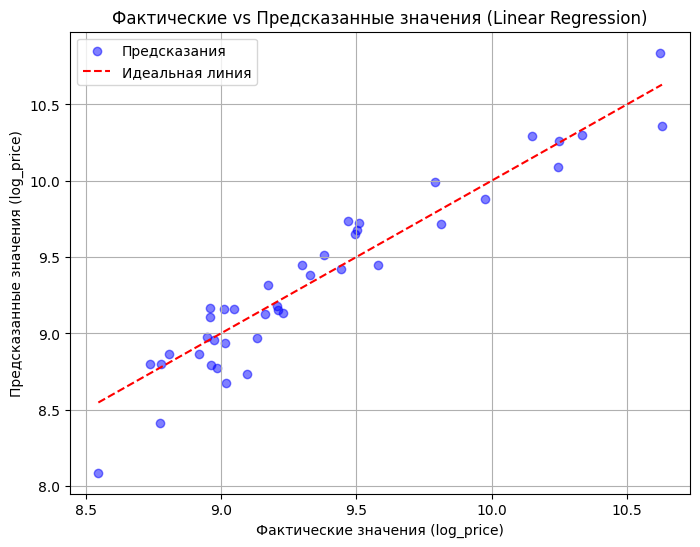

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lin_reg_predictions, alpha=0.5, color='blue', label='Предсказания')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Идеальная линия')
plt.xlabel("Фактические значения (log_price)")
plt.ylabel("Предсказанные значения (log_price)")
plt.title("Фактические vs Предсказанные значения (Linear Regression)")
plt.legend()
plt.grid()
plt.show()


График ошибок (остатков)

Показывает, как сильно модель ошибается.
Если модель хорошая, ошибки (остатки) должны быть случайно разбросаны вокруг нуля.

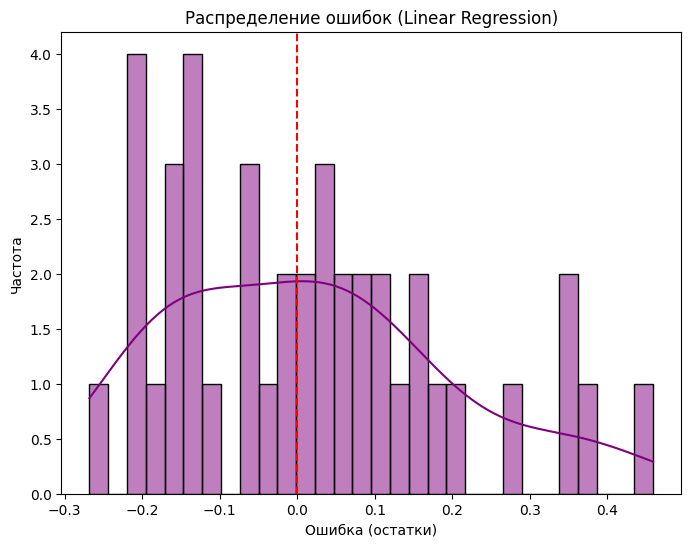

In [23]:
residuals = y_test - lin_reg_predictions  # Разница между реальными и предсказанными значениями

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Ошибка (остатки)")
plt.ylabel("Частота")
plt.title("Распределение ошибок (Linear Regression)")
plt.show()


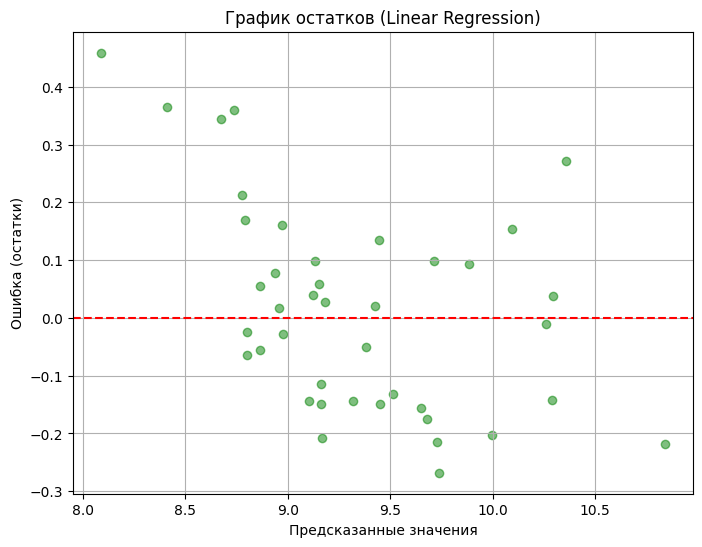

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(lin_reg_predictions, residuals, alpha=0.5, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Предсказанные значения")
plt.ylabel("Ошибка (остатки)")
plt.title("График остатков (Linear Regression)")
plt.grid()
plt.show()
